In [5]:
import numpy as np
import pandas as pd
from skimage.io import imread
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import pydicom as dicom
import os

In [6]:
PATH="archive/"
data_df = pd.read_csv(os.path.join(PATH,"overview.csv"))
print("CT Medical images -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

CT Medical images -  rows: 100  columns: 8


In [7]:
data_df.head()

,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm


In [8]:
print("Number of TIFF images:", len(os.listdir(os.path.join(PATH,"tiff_images"))))

Number of TIFF images: 100


In [9]:
tiff_data = pd.DataFrame([{'path': filepath} for filepath in glob(PATH+'tiff_images/*.tif')])

In [10]:
def process_data(path):
    data = pd.DataFrame([{'path': filepath} for filepath in glob(PATH+path)])
    data['file'] = data['path'].map(os.path.basename)
    data['ID'] = data['file'].map(lambda x: str(x.split('_')[1]))
    data['Age'] = data['file'].map(lambda x: int(x.split('_')[3]))
    data['Contrast'] = data['file'].map(lambda x: bool(int(x.split('_')[5])))
    data['Modality'] = data['file'].map(lambda x: str(x.split('_')[6].split('.')[-2]))
    return data

In [11]:
tiff_data = process_data('tiff_images/*.tif')
tiff_data.head(10)

,path,file,ID,Age,Contrast,Modality
0,archive/tiff_images\ID_0000_AGE_0060_CONTRAST_...,ID_0000_AGE_0060_CONTRAST_1_CT.tif,0000,60,True,CT
1,archive/tiff_images\ID_0001_AGE_0069_CONTRAST_...,ID_0001_AGE_0069_CONTRAST_1_CT.tif,0001,69,True,CT
2,archive/tiff_images\ID_0002_AGE_0074_CONTRAST_...,ID_0002_AGE_0074_CONTRAST_1_CT.tif,0002,74,True,CT
3,archive/tiff_images\ID_0003_AGE_0075_CONTRAST_...,ID_0003_AGE_0075_CONTRAST_1_CT.tif,0003,75,True,CT
4,archive/tiff_images\ID_0004_AGE_0056_CONTRAST_...,ID_0004_AGE_0056_CONTRAST_1_CT.tif,0004,56,True,CT
5,archive/tiff_images\ID_0005_AGE_0048_CONTRAST_...,ID_0005_AGE_0048_CONTRAST_1_CT.tif,0005,48,True,CT
6,archive/tiff_images\ID_0006_AGE_0075_CONTRAST_...,ID_0006_AGE_0075_CONTRAST_1_CT.tif,0006,75,True,CT
7,archive/tiff_images\ID_0007_AGE_0061_CONTRAST_...,ID_0007_AGE_0061_CONTRAST_1_CT.tif,0007,61,True,CT
8,archive/tiff_images\ID_0008_AGE_0051_CONTRAST_...,ID_0008_AGE_0051_CONTRAST_1_CT.tif,0008,51,True,CT
9,archive/tiff_images\ID_0009_AGE_0048_CONTRAST_...,ID_0009_AGE_0048_CONTRAST_1_CT.tif,0009,48,True,CT


In [12]:
dicom_data = process_data('dicom_dir/*.dcm')
dicom_data.head(10)

,path,file,ID,Age,Contrast,Modality
0,archive/dicom_dir\ID_0000_AGE_0060_CONTRAST_1_...,ID_0000_AGE_0060_CONTRAST_1_CT.dcm,0000,60,True,CT
1,archive/dicom_dir\ID_0001_AGE_0069_CONTRAST_1_...,ID_0001_AGE_0069_CONTRAST_1_CT.dcm,0001,69,True,CT
2,archive/dicom_dir\ID_0002_AGE_0074_CONTRAST_1_...,ID_0002_AGE_0074_CONTRAST_1_CT.dcm,0002,74,True,CT
3,archive/dicom_dir\ID_0003_AGE_0075_CONTRAST_1_...,ID_0003_AGE_0075_CONTRAST_1_CT.dcm,0003,75,True,CT
4,archive/dicom_dir\ID_0004_AGE_0056_CONTRAST_1_...,ID_0004_AGE_0056_CONTRAST_1_CT.dcm,0004,56,True,CT
5,archive/dicom_dir\ID_0005_AGE_0048_CONTRAST_1_...,ID_0005_AGE_0048_CONTRAST_1_CT.dcm,0005,48,True,CT
6,archive/dicom_dir\ID_0006_AGE_0075_CONTRAST_1_...,ID_0006_AGE_0075_CONTRAST_1_CT.dcm,0006,75,True,CT
7,archive/dicom_dir\ID_0007_AGE_0061_CONTRAST_1_...,ID_0007_AGE_0061_CONTRAST_1_CT.dcm,0007,61,True,CT
8,archive/dicom_dir\ID_0008_AGE_0051_CONTRAST_1_...,ID_0008_AGE_0051_CONTRAST_1_CT.dcm,0008,51,True,CT
9,archive/dicom_dir\ID_0009_AGE_0048_CONTRAST_1_...,ID_0009_AGE_0048_CONTRAST_1_CT.dcm,0009,48,True,CT


e:\GSoC\nationality_prediction\mlenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
e:\GSoC\nationality_prediction\mlenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
e:\GSoC\nationality_prediction\mlenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

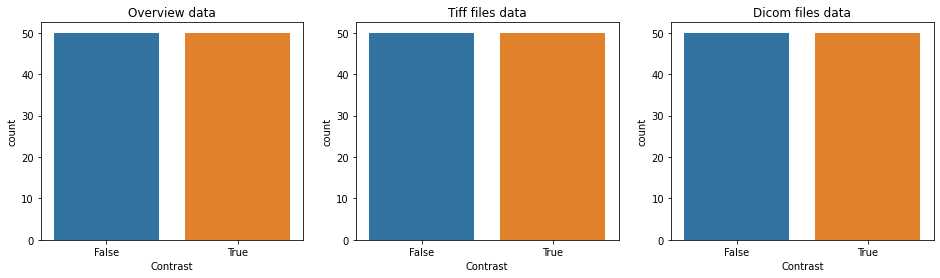

In [13]:
def countplot_comparison(feature):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16, 4))
    s1 = sns.countplot(data_df[feature], ax=ax1)
    s1.set_title("Overview data")
    s2 = sns.countplot(tiff_data[feature], ax=ax2)
    s2.set_title("Tiff files data")
    s3 = sns.countplot(dicom_data[feature], ax=ax3)
    s3.set_title("Dicom files data")
    plt.show()

countplot_comparison('Contrast')

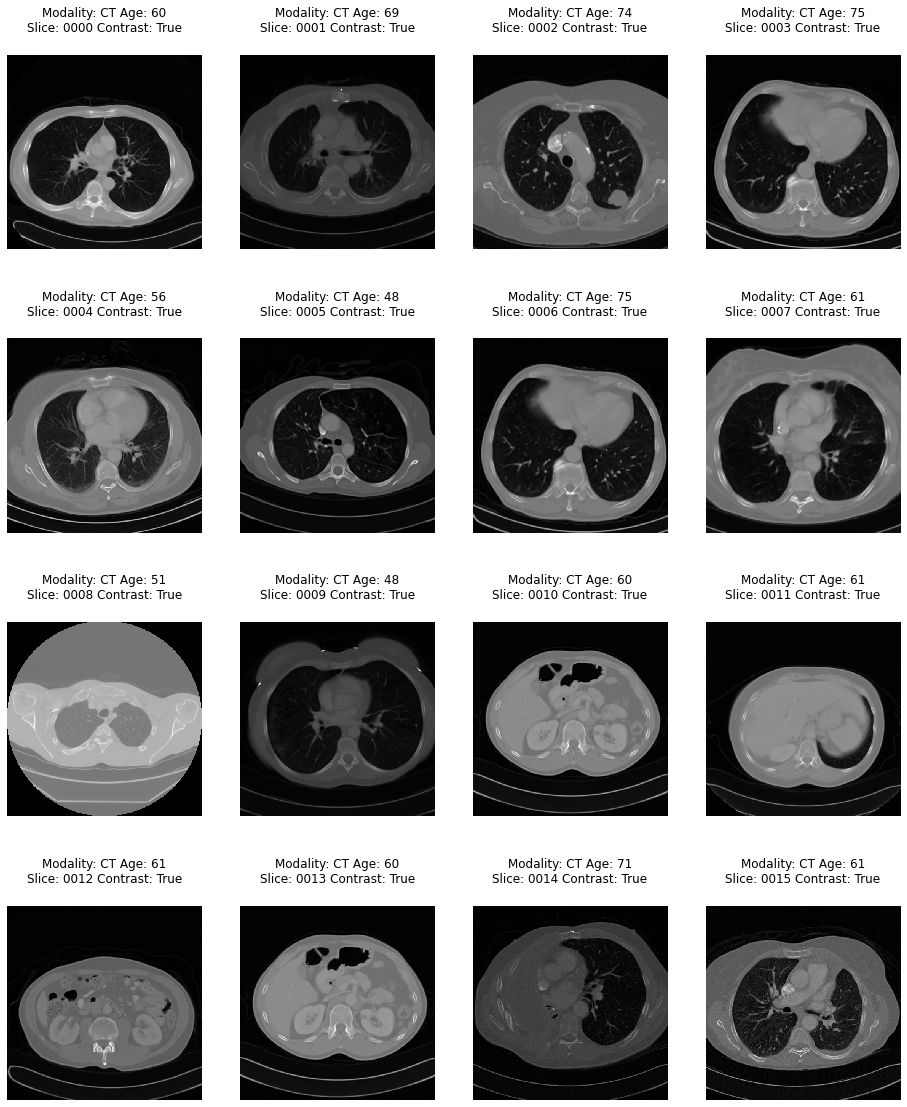

In [14]:
def show_images(data, dim=16, imtype='TIFF'):
    img_data = list(data[:dim].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):
        if(imtype=='TIFF'): 
            data_row_img = imread(data_row['path'])
        elif(imtype=='DICOM'):
            data_row_img = dicom.read_file(data_row['path'])
        if(imtype=='TIFF'):
            ax[i//4, i%4].matshow(data_row_img,cmap='gray')
        elif(imtype=='DICOM'):
            ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {Modality} Age: {Age}\nSlice: {ID} Contrast: {Contrast}'.format(**data_row))
    plt.show()

show_images(tiff_data,16,'TIFF')

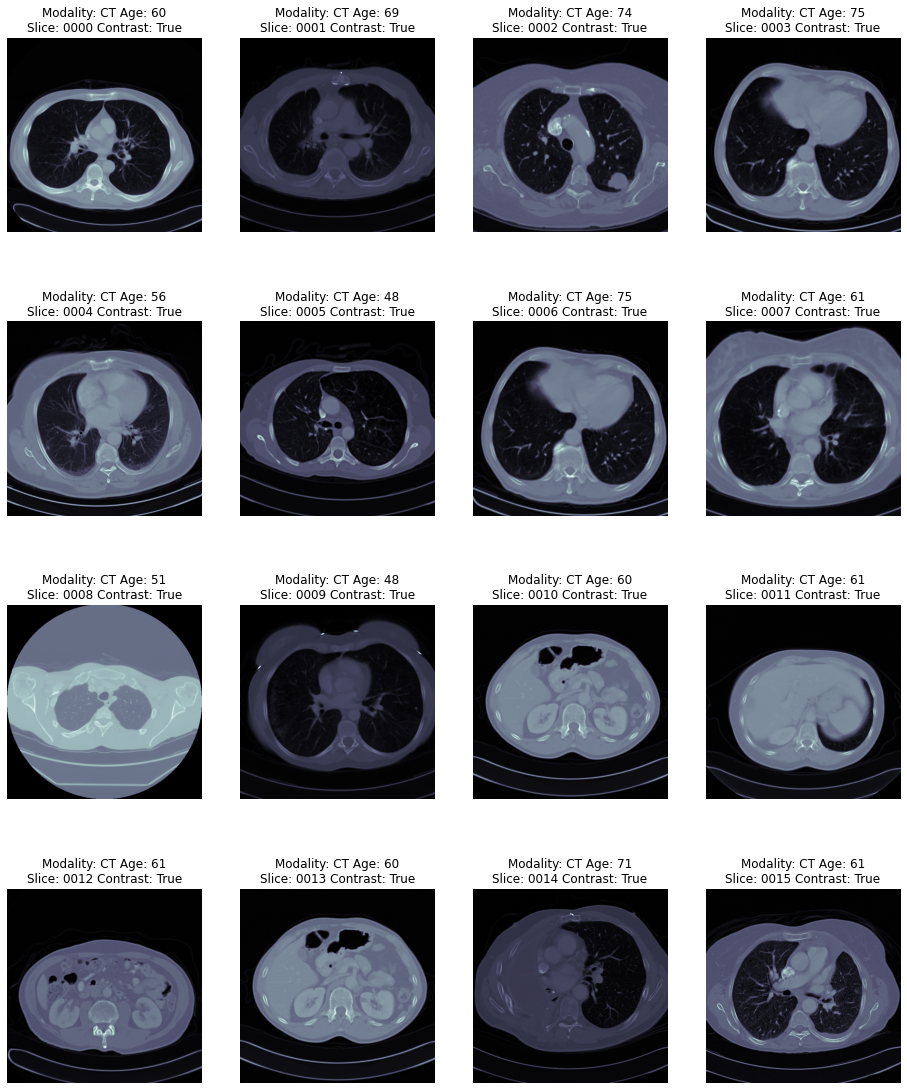

In [15]:
def extract_voxel_data(list_of_dicom_files):  
    datasets = [dicom.read_file(f) for f in list_of_dicom_files]  
    try:
        voxel_ndarray, ijk_to_xyz = dicom_numpy.combine_slices(datasets)  
    except dicom_numpy.DicomImportException as e:
        raise  
    return voxel_ndarray

show_images(dicom_data,16,'DICOM')

In [16]:
dicom_file_path = list(dicom_data[:1].T.to_dict().values())[0]['path']
dicom_file_dataset = dicom.read_file(dicom_file_path)
dicom_file_dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

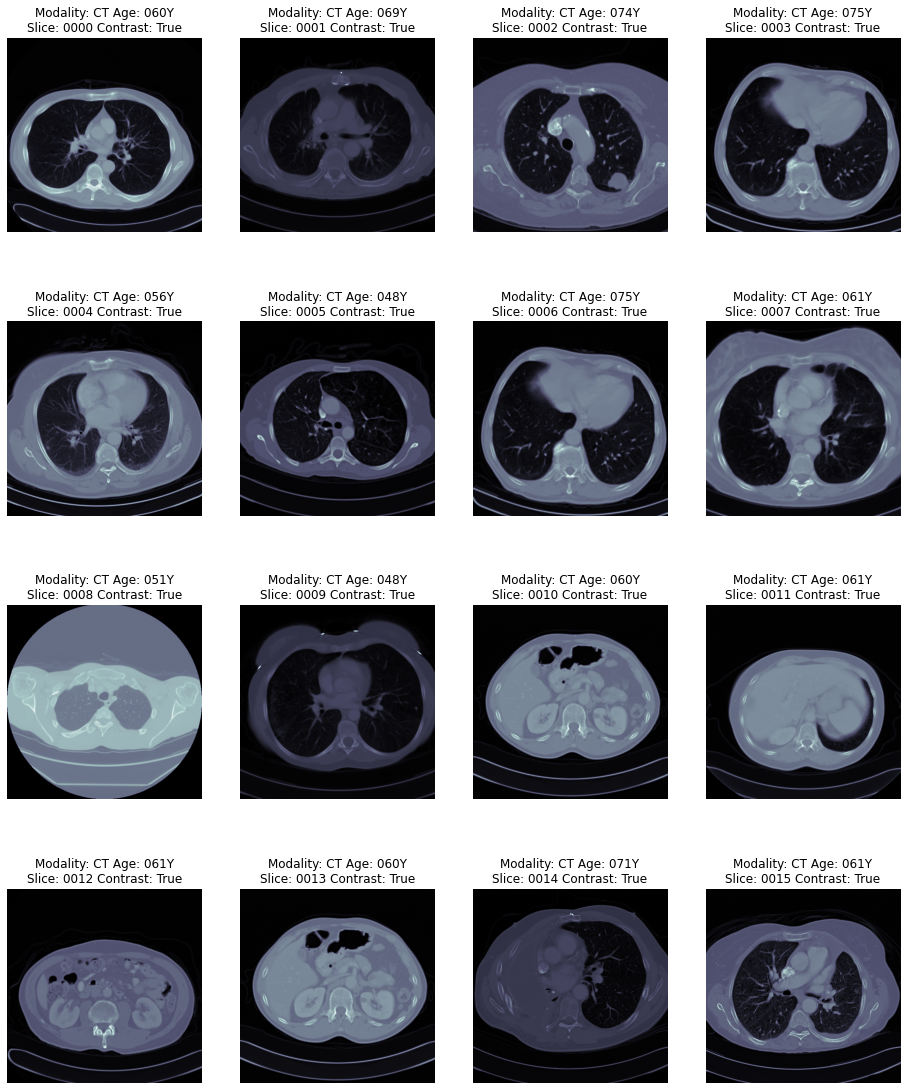

In [17]:
def show_dicom_images(data):
    img_data = list(data[:16].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):

        data_row_img = dicom.read_file(data_row['path'])
        modality = data_row_img.Modality
        age = data_row_img.PatientAge
        
        ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {} Age: {}\nSlice: {} Contrast: {}'.format(
         modality, age, data_row['ID'], data_row['Contrast']))
    plt.show()

show_dicom_images(dicom_data)

# Creating ML Model

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from glob import glob
import re
from skimage.io import imread
import keras

In [2]:
%matplotlib inline
import os
for dirname, _, filenames in os.walk('archive/'):
    print(dirname,"______")
    for filename in filenames:
        print(os.path.join(dirname, filename))

archive/ ______
archive/full_archive.npz
archive/overview.csv
archive/dicom_dir ______
archive/dicom_dir\ID_0000_AGE_0060_CONTRAST_1_CT.dcm
archive/dicom_dir\ID_0001_AGE_0069_CONTRAST_1_CT.dcm
archive/dicom_dir\ID_0002_AGE_0074_CONTRAST_1_CT.dcm
archive/dicom_dir\ID_0003_AGE_0075_CONTRAST_1_CT.dcm
archive/dicom_dir\ID_0004_AGE_0056_CONTRAST_1_CT.dcm
archive/dicom_dir\ID_0005_AGE_0048_CONTRAST_1_CT.dcm
archive/dicom_dir\ID_0006_AGE_0075_CONTRAST_1_CT.dcm
archive/dicom_dir\ID_0007_AGE_0061_CONTRAST_1_CT.dcm
archive/dicom_dir\ID_0008_AGE_0051_CONTRAST_1_CT.dcm
archive/dicom_dir\ID_0009_AGE_0048_CONTRAST_1_CT.dcm
archive/dicom_dir\ID_0010_AGE_0060_CONTRAST_1_CT.dcm
archive/dicom_dir\ID_0011_AGE_0061_CONTRAST_1_CT.dcm
archive/dicom_dir\ID_0012_AGE_0061_CONTRAST_1_CT.dcm
archive/dicom_dir\ID_0013_AGE_0060_CONTRAST_1_CT.dcm
archive/dicom_dir\ID_0014_AGE_0071_CONTRAST_1_CT.dcm
archive/dicom_dir\ID_0015_AGE_0061_CONTRAST_1_CT.dcm
archive/dicom_dir\ID_0016_AGE_0063_CONTRAST_1_CT.dcm
archive/dico

In [3]:
BASE_IMG_PATH='archive/' #../input/siim-medical-images/overview.csv
path= os.path.join(BASE_IMG_PATH,'overview.csv')
overview = pd.read_csv(path, index_col=0)
overview.head()

,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm


In [ ]:
overview.tail()

In [21]:
len(overview)

100

In [4]:
overview['Contrast'] = overview['Contrast'].map(lambda x: 1 if x else 0)

e:\GSoC\nationality_prediction\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

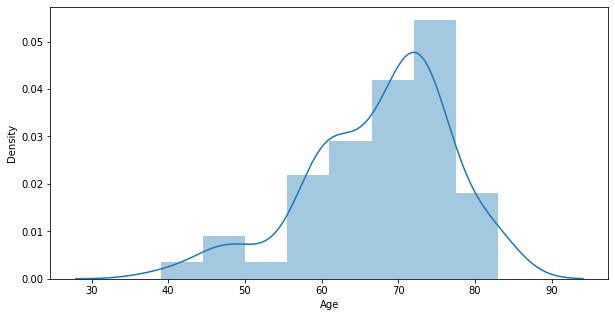

In [5]:
plt.figure(figsize=(10,5))
sns.distplot(overview['Age'])

e:\GSoC\nationality_prediction\mlenv\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
e:\GSoC\nationality_prediction\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\GSoC\nationality_prediction\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


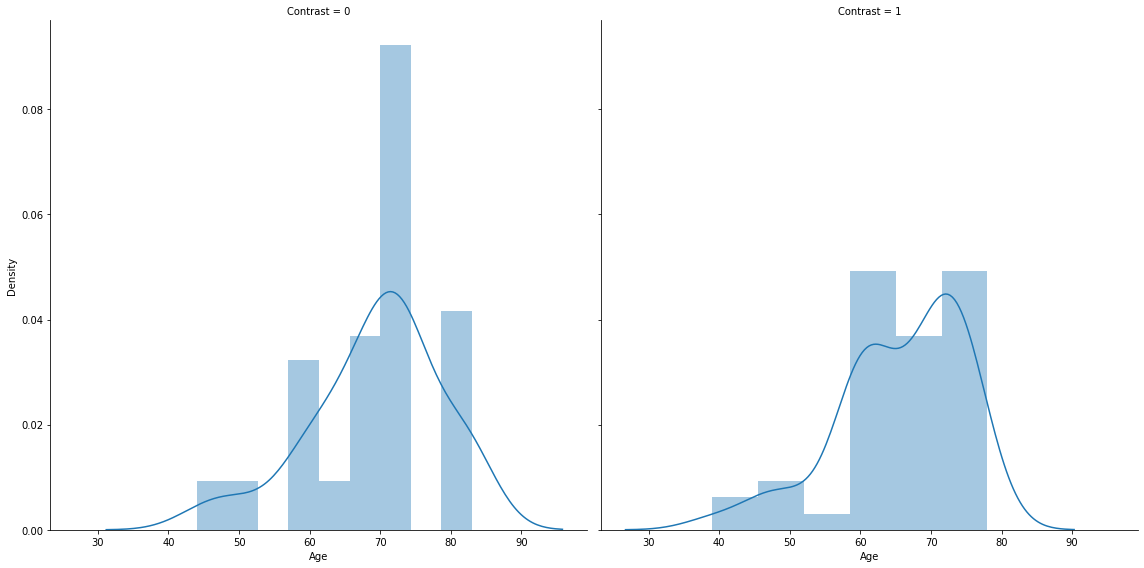

In [24]:
g = sns.FacetGrid(overview, col="Contrast", size=8)
g = g.map(sns.distplot, "Age")

e:\GSoC\nationality_prediction\mlenv\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
e:\GSoC\nationality_prediction\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\GSoC\nationality_prediction\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


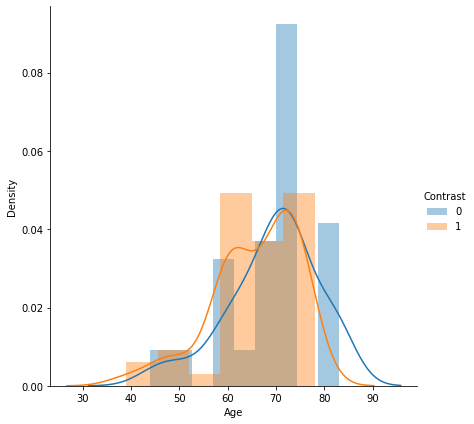

In [6]:
g = sns.FacetGrid(overview, hue="Contrast",size=6, legend_out=True)
g = g.map(sns.distplot, "Age").add_legend()

In [7]:
BASE_IMG_PATH='archive/'
print(os.path.join(BASE_IMG_PATH,'tiff_images','*.tif'))
all_images_list = glob(os.path.join(BASE_IMG_PATH,'tiff_images','*.tif'))
all_images_list[:5]
print(all_images_list)

archive/tiff_images\*.tif
['archive/tiff_images\\ID_0000_AGE_0060_CONTRAST_1_CT.tif', 'archive/tiff_images\\ID_0001_AGE_0069_CONTRAST_1_CT.tif', 'archive/tiff_images\\ID_0002_AGE_0074_CONTRAST_1_CT.tif', 'archive/tiff_images\\ID_0003_AGE_0075_CONTRAST_1_CT.tif', 'archive/tiff_images\\ID_0004_AGE_0056_CONTRAST_1_CT.tif', 'archive/tiff_images\\ID_0005_AGE_0048_CONTRAST_1_CT.tif', 'archive/tiff_images\\ID_0006_AGE_0075_CONTRAST_1_CT.tif', 'archive/tiff_images\\ID_0007_AGE_0061_CONTRAST_1_CT.tif', 'archive/tiff_images\\ID_0008_AGE_0051_CONTRAST_1_CT.tif', 'archive/tiff_images\\ID_0009_AGE_0048_CONTRAST_1_CT.tif', 'archive/tiff_images\\ID_0010_AGE_0060_CONTRAST_1_CT.tif', 'archive/tiff_images\\ID_0011_AGE_0061_CONTRAST_1_CT.tif', 'archive/tiff_images\\ID_0012_AGE_0061_CONTRAST_1_CT.tif', 'archive/tiff_images\\ID_0013_AGE_0060_CONTRAST_1_CT.tif', 'archive/tiff_images\\ID_0014_AGE_0071_CONTRAST_1_CT.tif', 'archive/tiff_images\\ID_0015_AGE_0061_CONTRAST_1_CT.tif', 'archive/tiff_images\\ID_0016

In [8]:
imread(all_images_list[0]).shape

(512, 512)

In [28]:
np.array(np.arange(81)).reshape(9,9)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [29]:
np.array(np.arange(81)).reshape(9,9)[::3,::3]

array([[ 0,  3,  6],
       [27, 30, 33],
       [54, 57, 60]])

In [9]:
np.expand_dims(imread(all_images_list[0])[::4,::4],0).shape

(1, 128, 128)

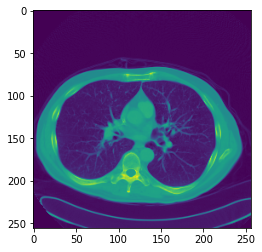

In [11]:
jimread = lambda x: np.expand_dims(imread(x)[::2,::2],0)
test_image = jimread(all_images_list[0])
plt.imshow(test_image[0])

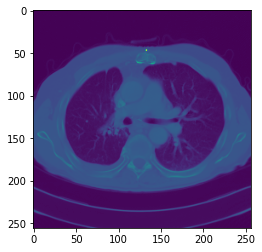

In [12]:
test_image1 = jimread(all_images_list[1])
plt.imshow(test_image1[0])

In [13]:
test_image1[0].shape

(256, 256)

In [14]:
# archive/tiff_images\\ID_0053_AGE_0073_CONTRAST_0_CT.tif
check_contrast = re.compile(r'/tiff_images\\ID_([\d]+)_AGE_[\d]+_CONTRAST_([\d]+)_CT.tif')
label = []
id_list = []
for image in all_images_list:
    id_list.append(check_contrast.findall(image)[0][0])
    label.append(check_contrast.findall(image)[0][1])

In [15]:
label_list = pd.DataFrame(label,id_list)
overview.tail()

,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
95,71,0,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,95,ID_0095_AGE_0071_CONTRAST_0_CT.tif,ID_0095_AGE_0071_CONTRAST_0_CT.dcm
96,83,0,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,96,ID_0096_AGE_0083_CONTRAST_0_CT.tif,ID_0096_AGE_0083_CONTRAST_0_CT.dcm
97,60,0,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,97,ID_0097_AGE_0060_CONTRAST_0_CT.tif,ID_0097_AGE_0060_CONTRAST_0_CT.dcm
98,61,0,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,98,ID_0098_AGE_0061_CONTRAST_0_CT.tif,ID_0098_AGE_0061_CONTRAST_0_CT.dcm
99,61,0,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,99,ID_0099_AGE_0061_CONTRAST_0_CT.tif,ID_0099_AGE_0061_CONTRAST_0_CT.dcm


In [16]:
print(label_list[0])

0000    1
0001    1
0002    1
0003    1
0004    1
       ..
0095    0
0096    0
0097    0
0098    0
0099    0
Name: 0, Length: 100, dtype: object


In [37]:
label_list.head(10)

,0
0000,1
0001,1
0002,1
0003,1
0004,1
0005,1
0006,1
0007,1
0008,1
0009,1


In [17]:
label_list.tail(10)

,0
0090,0
0091,0
0092,0
0093,0
0094,0
0095,0
0096,0
0097,0
0098,0
0099,0


In [18]:
label_list.shape

(100, 1)

In [19]:
images = np.stack([jimread(i) for i in all_images_list],0)

In [20]:
len(images)

100

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(images, label_list, test_size=0.1, random_state=0)

In [23]:
n_train, depth, width, height = X_train.shape
n_test,_,_,_ = X_test.shape

In [24]:
n_train,depth, width, height

(90, 1, 256, 256)

In [25]:
input_shape = (width,height,depth)

input_shape

(256, 256, 1)

In [26]:
input_train = X_train.reshape((n_train, width,height,depth))
input_train.shape
input_train.astype('float32')
input_train = input_train / np.max(input_train)
input_train.max()

1.0

In [27]:
input_test = X_test.reshape(n_test, *input_shape)
input_test.astype('float32')
input_test = input_test / np.max(input_test)

In [28]:
output_train = keras.utils.to_categorical(y_train, 2)
output_test = keras.utils.to_categorical(y_test, 2)
output_train[5]

array([0., 1.], dtype=float32)

In [29]:
output_train[6]
output_train[8]
output_test[5]
input_train[5]

array([[[-0.98469554],
        [-0.98469554],
        [-0.98469554],
        ...,
        [-0.98469554],
        [-0.98469554],
        [-0.98469554]],

       [[-0.98469554],
        [-0.98469554],
        [-0.98469554],
        ...,
        [-0.98469554],
        [-0.98469554],
        [-0.98469554]],

       [[-0.98469554],
        [-0.98469554],
        [-0.98469554],
        ...,
        [-0.98469554],
        [-0.98469554],
        [-0.98469554]],

       ...,

       [[-0.98469554],
        [-0.98469554],
        [-0.98469554],
        ...,
        [-0.98469554],
        [-0.98469554],
        [-0.98469554]],

       [[-0.98469554],
        [-0.98469554],
        [-0.98469554],
        ...,
        [-0.98469554],
        [-0.98469554],
        [-0.98469554]],

       [[-0.98469554],
        [-0.98469554],
        [-0.98469554],
        ...,
        [-0.98469554],
        [-0.98469554],
        [-0.98469554]]])

In [49]:
input_train.shape

(90, 256, 256, 1)

In [30]:
input_train[1].shape

(256, 256, 1)

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D

In [32]:
batch_size = 20
epochs = 30

In [33]:
model2 = Sequential()
model2.add(Conv2D(50, (5, 5), activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(3, 3))) 
model2.add(Conv2D(30, (4, 4), activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(2, activation='softmax'))

In [34]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 50)      1300      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 81, 81, 30)        24030     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 40, 40, 30)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 48000)             0         
                                                                 
 dense (Dense)               (None, 2)                 9

In [35]:
model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [36]:
history = model2.fit(input_train, output_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(input_test, output_test))

Epoch 1/30
5/5 [==============================] - 8s 1s/step - loss: 0.7369 - accuracy: 0.6000 - val_loss: 0.9081 - val_accuracy: 0.3000
Epoch 2/30
5/5 [==============================] - 5s 1s/step - loss: 0.6574 - accuracy: 0.5222 - val_loss: 0.6842 - val_accuracy: 0.3000
Epoch 3/30
5/5 [==============================] - 6s 1s/step - loss: 0.5906 - accuracy: 0.6667 - val_loss: 0.6291 - val_accuracy: 0.5000
Epoch 4/30
5/5 [==============================] - 6s 1s/step - loss: 0.4443 - accuracy: 0.8333 - val_loss: 0.4118 - val_accuracy: 0.8000
Epoch 5/30
5/5 [==============================] - 6s 1s/step - loss: 0.2780 - accuracy: 0.9333 - val_loss: 0.4981 - val_accuracy: 0.8000
Epoch 6/30
5/5 [==============================] - 6s 1s/step - loss: 0.2247 - accuracy: 0.8889 - val_loss: 0.1031 - val_accuracy: 1.0000
Epoch 7/30
5/5 [==============================] - 6s 1s/step - loss: 0.0887 - accuracy: 0.9889 - val_loss: 0.2319 - val_accuracy: 0.8000
Epoch 8/30
5/5 [=========================

In [37]:
score = model2.evaluate(input_test, output_test, verbose=0)
score

[0.007664510048925877, 1.0]

In [38]:
model2.save('model_dicom_cancer.h5')

In [39]:
input_test[1].shape

(256, 256, 1)

In [40]:
model2.predict(input_test)

1/1 [==============================] - 0s 228ms/step


array([[2.1189960e-11, 1.0000000e+00],
       [9.9391526e-01, 6.0846899e-03],
       [1.6331234e-03, 9.9836689e-01],
       [9.9228173e-01, 7.7182488e-03],
       [9.5593470e-01, 4.4065308e-02],
       [9.9999511e-01, 4.9186847e-06],
       [3.5057374e-04, 9.9964941e-01],
       [9.8934841e-01, 1.0651535e-02],
       [9.9999785e-01, 2.1678577e-06],
       [9.9498558e-01, 5.0143912e-03]], dtype=float32)

In [41]:
input_test[0].shape
type(input_test)

numpy.ndarray

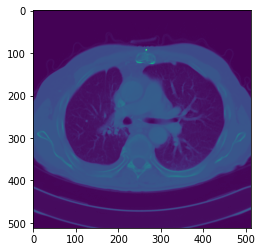

In [42]:
import pydicom as dicom
import matplotlib.pylab as plt
# specify your image path
image_path = 'archive/dicom_dir/ID_0001_AGE_0069_CONTRAST_1_CT.dcm'
ds = dicom.dcmread(image_path)
test1 = ds.pixel_array
plt.imshow(test1)

In [43]:
from skimage.transform import resize
IMG_PX_SIZE = 256
resized1 = resize(test1, (IMG_PX_SIZE, IMG_PX_SIZE, 1), anti_aliasing=True)
resized1.shape

(256, 256, 1)

In [44]:
pred1 = model2.predict(resized1.reshape(1,256, 256, 1))

1/1 [==============================] - 0s 78ms/step


In [45]:
pred1[0]

array([0.02413894, 0.9758611 ], dtype=float32)

In [46]:
round_prediction1 = np.round(pred1[0])
round_prediction1

array([0., 1.], dtype=float32)

In [47]:
prediction = str('%.2f' % (pred1[0][1]*100) + '%')
prediction

'97.59%'

97.59% The patient has Cancer disease


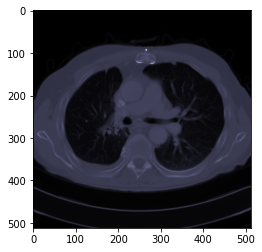

In [48]:
round_prediction1 = np.round(pred1[0])
prob = str('%.2f' % (pred1[0][1]*100) + '%')
if pred1[0][1]*100 < 90:
    print('Normal Patient')
else:
    print(prob,"The patient has Cancer disease")
plt.imshow(test1, cmap="bone")

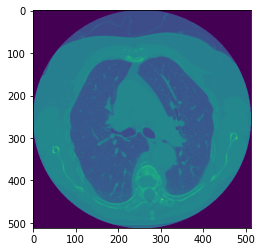

In [11]:
import pydicom as dicom
import matplotlib.pylab as plt
# specify your image path
image_path = 'archive/dicom_dir/ID_0090_AGE_0067_CONTRAST_0_CT.dcm'
ds = dicom.dcmread(image_path)
test90 = ds.pixel_array
plt.imshow(test90)

In [12]:
from skimage.transform import resize
IMG_PX_SIZE = 256
resized90 = resize(test90, (IMG_PX_SIZE, IMG_PX_SIZE, 1), anti_aliasing=True)
resized90.shape
pred90 = model2.predict(resized90.reshape(1,256, 256, 1))

round_prediction90 = np.round(pred90[0])
prob = str('%.2f' % (pred90[0][1]*100) + '%')
if pred90[0][1]*100 < 95:
    print(prob, 'Normal Patient')
else:
    print(prob, "The patient has Cancer disease ")
plt.imshow(test90, cmap="bone")

NameError: name 'model2' is not defined

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

def predict(image_path):

    model_h5 = tf.keras.models.load_model(
    './model_dicom_cancer.h5', custom_objects={'KerasLayer': hub.KerasLayer})

    pred90 = model_h5.predict(image_path.reshape(1,256, 256, 1))

    pred90 = pred90[0][1]*100

    if int(pred90) < 95:
        print(pred90, '%', 'Normal Patient')
    else: 
        print(pred90, '%', 'The patient has Cancer disease')

1/1 [==============================] - 0s 77ms/step
33.65499675273895 % Normal Patient


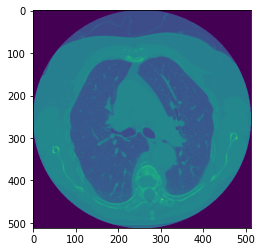

In [9]:
import pydicom as dicom
from skimage.transform import resize
import matplotlib.pylab as plt
image_path = 'archive/dicom_dir/ID_0090_AGE_0067_CONTRAST_0_CT.dcm'
ds = dicom.dcmread(image_path)
test90 = ds.pixel_array
IMG_PX_SIZE = 256
resized90 = resize(test90, (IMG_PX_SIZE, IMG_PX_SIZE, 1), anti_aliasing=True)
predict(resized90)
# Save the predicted image
plt.imshow(test90)
plt.savefig('temp/tmp.png')